In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/projectsRP/500_Price Strategy Based on ML

/content/drive/MyDrive/projectsRP/500_Price Strategy Based on ML


In [ ]:
data = pd.read_csv("train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**Feature Importance Using Random Forest Classifier**

In [ ]:
X = data.iloc[:,-1].values
y = data.drop("price_range",axis=1).values
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = RandomForestClassifier()
model.fit(y_train,X_train)

<ipython-input-5-a2255ce6cdc6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(y_train,X_train)


RandomForestClassifier()

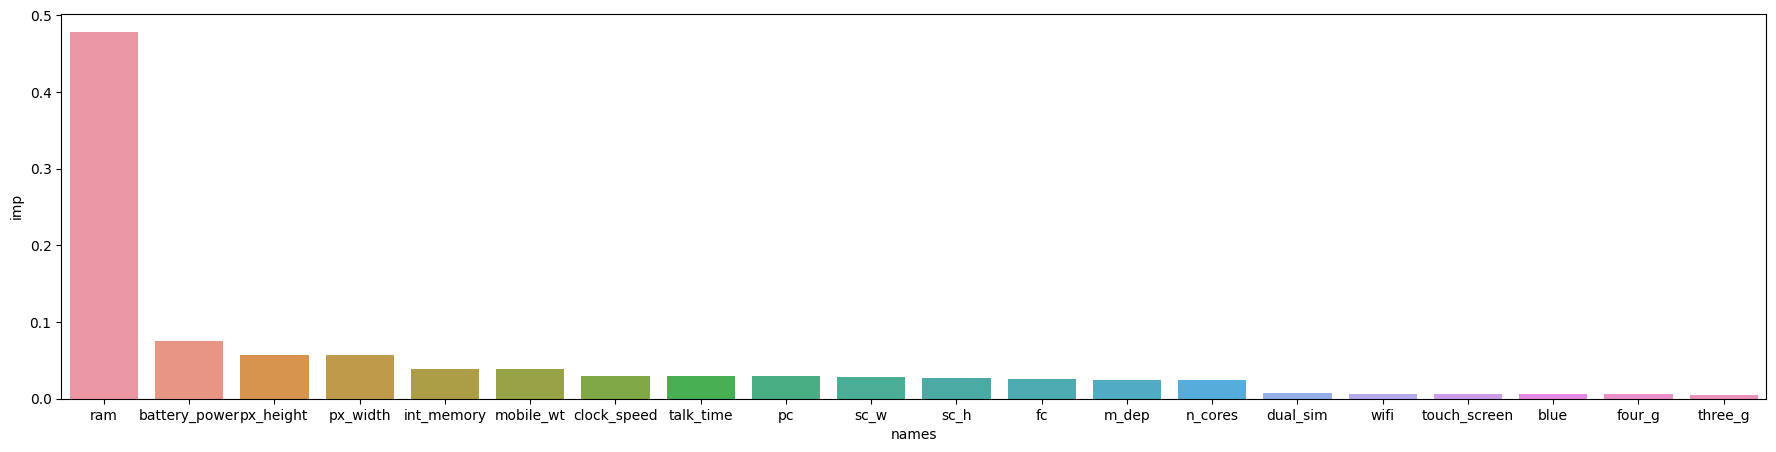

In [ ]:
columns = []
imp = []
for feature_name, importance in zip(data.drop("price_range",axis=1).columns, model.feature_importances_):
  columns.append(feature_name)
  imp.append(importance)

imp_features = pd.DataFrame({"names" : columns, 
                               "imp" : imp})
imp_featuresm_sorted = imp_features.sort_values(by='imp', ascending=False)

plt.figure(figsize=(22,5))
sns.barplot(x=imp_featuresm_sorted["names"], 
                y=imp_featuresm_sorted["imp"])
plt.show()

In [ ]:
imp_featuresm_sorted

,names,imp
13,ram,0.478245
0,battery_power,0.074716
11,px_height,0.057282
12,px_width,0.057005
6,int_memory,0.038818
8,mobile_wt,0.038149
2,clock_speed,0.029817
16,talk_time,0.029520
10,pc,0.029390
15,sc_w,0.028224


**Selecting top 10 Features for Model Building**

In [ ]:
imp_featuresm_sorted.head(10)

,names,imp
13,ram,0.479615
0,battery_power,0.073717
12,px_width,0.058369
11,px_height,0.058334
8,mobile_wt,0.040081
6,int_memory,0.034618
16,talk_time,0.030561
10,pc,0.030117
2,clock_speed,0.028876
15,sc_w,0.028198


In [ ]:
top_features = ["ram","battery_power",
                      "px_width","px_height","mobile_wt","int_memory",
                  "talk_time","pc","sc_w","clock_speed","price_range"]

In [ ]:
model_data = data[top_features]

In [ ]:
model_data.head(10)

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,talk_time,pc,sc_w,clock_speed,price_range
0,2549,842,756,20,188,7,19,2,7,2.2,1
1,2631,1021,1988,905,136,53,7,6,3,0.5,2
2,2603,563,1716,1263,145,41,9,6,2,0.5,2
3,2769,615,1786,1216,131,10,11,9,8,2.5,2
4,1411,1821,1212,1208,141,44,15,14,2,1.2,1
5,1067,1859,1654,1004,164,22,10,7,1,0.5,1
6,3220,1821,1018,381,139,10,18,10,8,1.7,3
7,700,1954,1149,512,187,24,5,0,3,0.5,0
8,1099,1445,836,386,174,53,20,14,1,0.5,0
9,513,509,1224,1137,93,9,12,15,10,0.6,0


**Data Split into Train & Test**

In [ ]:
X=model_data.drop(['price_range'], axis=1)
y=model_data['price_range']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

## **Extreme Gradient Boosting Classifier**

In [ ]:
XGB_classifier= xgb.XGBClassifier()
XGB_classifier.fit(X_train,y_train)
XGB_predictions = XGB_classifier.predict(X_test)

In [ ]:
print("Accuracy of XGB Classifier: ",accuracy_score(y_test, XGB_predictions))

Accuracy of XGB Classifier:  0.9275


In [ ]:
print(classification_report(y_test, XGB_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.92      0.93        92
           2       0.87      0.87      0.87        99
           3       0.92      0.94      0.93       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



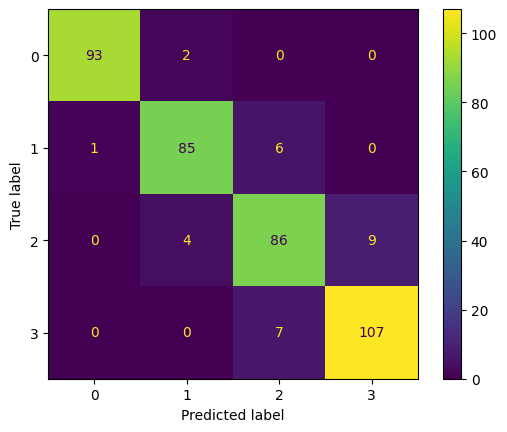

In [ ]:
cm = confusion_matrix(y_test, XGB_predictions, labels=XGB_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=XGB_classifier.classes_)
disp.plot()

## **Extreme Gradient Boosting Classifier Hyper-Parameter Tunning**

In [ ]:
XGB_hyperparameters = {'n_estimators': [10,20,30,40,50,100,200,250],
              'max_depth': [2, 3, 4, 5,7,8,9],
              'learning_rate': [0.01, 0.05],
              'colsample_bytree': [0.5, 0.7, 1.0],
              'reg_alpha': [0, 0.5],
              'reg_lambda': [1, 1.5]}

XGB_search = RandomizedSearchCV(estimator=XGB_classifier, param_distributions=XGB_hyperparameters, cv=5, n_jobs=-1)
XGB_search.fit(X_train, y_train)
print("Best XGB Hyperparameters:", XGB_search.best_params_)
print("Best XGB Score:", XGB_search.best_score_)

Best XGB Hyperparameters: {'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best XGB Score: 0.89375


In [ ]:
final_XGB = xgb.XGBClassifier(**XGB_search.best_params_)
final_XGB.fit(X_train,y_train)
final_XGB_predictions = final_XGB.predict(X_test)

In [ ]:
print("Accuracy of XGB Classifier: ",accuracy_score(y_test, final_XGB_predictions))

Accuracy of XGB Classifier:  0.91


In [ ]:
print(classification_report(y_test, final_XGB_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.88      0.89      0.89        92
           2       0.85      0.82      0.84        99
           3       0.92      0.95      0.94       114

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



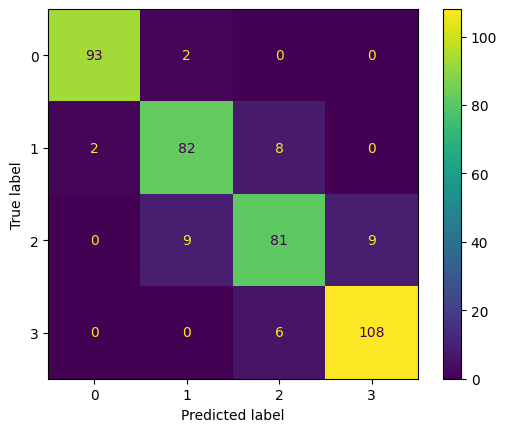

In [ ]:
cm = confusion_matrix(y_test, final_XGB_predictions, labels=final_XGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=final_XGB.classes_)
disp.plot()

## **Decision Tree Classifier**

In [ ]:
DT_classifier= DecisionTreeClassifier()
DT_classifier.fit(X_train,y_train)
DT_predictions = DT_classifier.predict(X_test)

In [ ]:
print("Accuracy of Decision Tree Classifier: ",accuracy_score(y_test, DT_predictions))

Accuracy of Decision Tree Classifier:  0.8275


In [ ]:
print(classification_report(y_test, DT_predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        95
           1       0.80      0.74      0.77        92
           2       0.70      0.77      0.73        99
           3       0.89      0.86      0.88       114

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



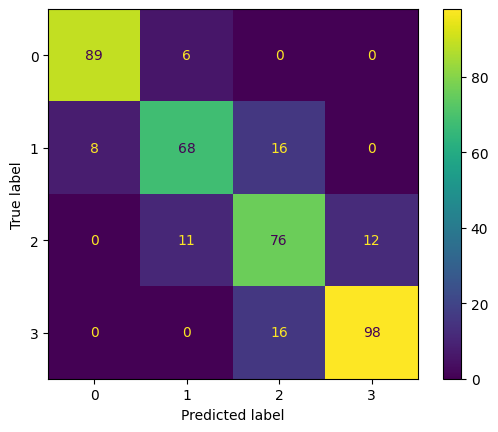

In [ ]:
cm = confusion_matrix(y_test, DT_predictions, labels=DT_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=DT_classifier.classes_)
disp.plot()

## **Decision Tree Classifier Hyper-Parameter Tunning**

In [ ]:
DT_parameters = {'max_depth': [4,6,8,10,12,16,18,22,24,26],
              'min_samples_leaf': [1, 2, 3, 4, 5,7,8,9,10,11,12,13,14,15,20],
              'min_samples_split': [2, 3, 4, 5,7,8,9,10,11,12,13,14,15],
              'criterion': ['gini', 'entropy']}

DT_search = RandomizedSearchCV(estimator=DT_classifier, param_distributions=DT_parameters, cv=5, n_jobs=-1)
DT_search.fit(X_train, y_train)
print("Best Decision Tree Hyperparameters:", DT_search.best_params_)
print("Best Decision Tree Score:", DT_search.best_score_)

Best Decision Tree Hyperparameters: {'min_samples_split': 9, 'min_samples_leaf': 8, 'max_depth': 12, 'criterion': 'entropy'}
Best Decision Tree Score: 0.8618750000000001


In [ ]:
final_DT = DecisionTreeClassifier(**DT_search.best_params_)
final_DT.fit(X_train,y_train)
final_DT_predictions = final_DT.predict(X_test)

In [ ]:
print("Accuracy of Decision Tree Classifier: ",accuracy_score(y_test, final_DT_predictions))

Accuracy of Decision Tree Classifier:  0.84


In [ ]:
print(classification_report(y_test, final_DT_predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        95
           1       0.74      0.80      0.77        92
           2       0.81      0.76      0.78        99
           3       0.91      0.91      0.91       114

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



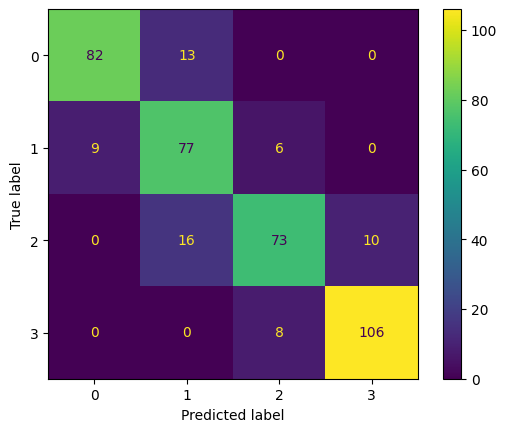

In [ ]:
cm = confusion_matrix(y_test, final_DT_predictions, labels=final_DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=final_DT.classes_)
disp.plot()

## **K Neighbours Classifier**

In [ ]:
KNN_classifier= KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(X_train,y_train)
KNN_predictions = KNN_classifier.predict(X_test)

In [ ]:
print("Accuracy of XGB Classifier: ",accuracy_score(y_test, KNN_predictions))

Accuracy of XGB Classifier:  0.9275


In [ ]:
print(classification_report(y_test, KNN_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.91      0.93      0.92        92
           2       0.90      0.86      0.88        99
           3       0.93      0.95      0.94       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



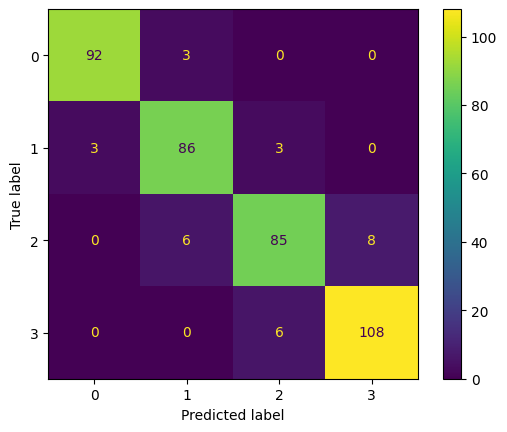

In [ ]:
cm = confusion_matrix(y_test, KNN_predictions, labels=KNN_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=KNN_classifier.classes_)
disp.plot()

## **K Neighbours Classifier Hyper-Parameter Tunning**

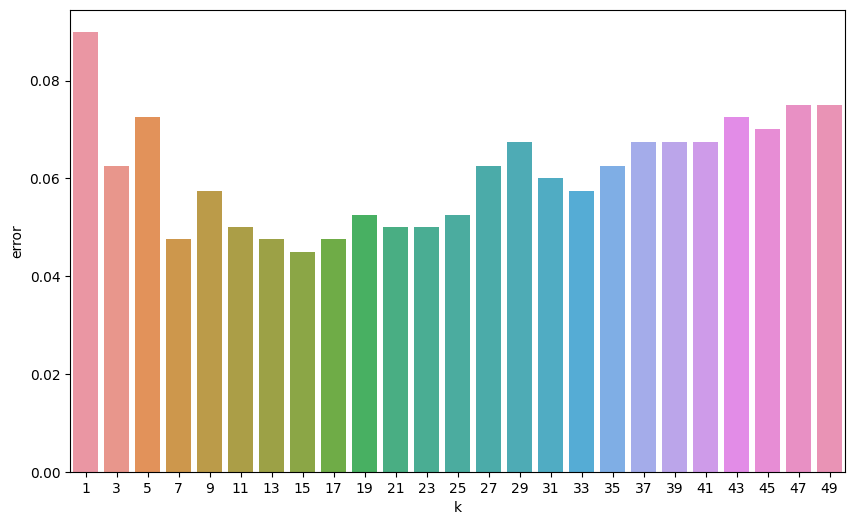

In [ ]:
error = []
k = []
for i in range(1,50,2):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,y_train)
  pred =  KNN.predict(X_test)
  error.append(np.mean(pred != y_test))
  k.append(i)

KNN_data = pd.DataFrame({"k" : k, 
                               "error" : error})

KNN_data.head()
plt.figure(figsize=(10,6))
sns.barplot(x=KNN_data["k"], 
                y=KNN_data["error"])
plt.show()

In [ ]:
final_KNN_classifier= KNeighborsClassifier(n_neighbors=15)
final_KNN_classifier.fit(X_train,y_train)
final_KNN_predictions = final_KNN_classifier.predict(X_test)

In [ ]:
print("Accuracy of KNN Classifier: ",accuracy_score(y_test, final_KNN_predictions))

Accuracy of KNN Classifier:  0.955


In [ ]:
print(classification_report(y_test, final_KNN_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.95      0.97      0.96        92
           2       0.94      0.92      0.93        99
           3       0.96      0.96      0.96       114

    accuracy                           0.95       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.95      0.95      0.95       400



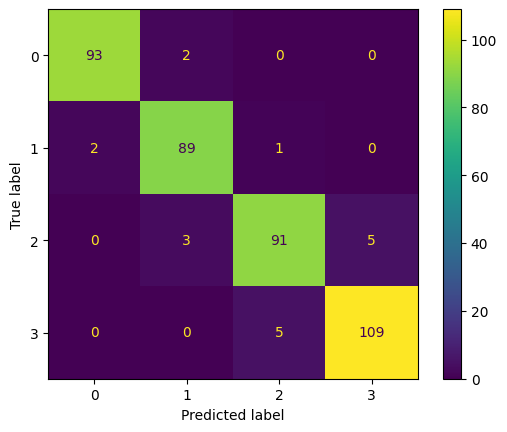

In [ ]:
cm = confusion_matrix(y_test, final_KNN_predictions, labels=final_KNN_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=final_KNN_classifier.classes_)
disp.plot()